In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None

In [28]:
df = pd.read_csv('train.csv')

print(df.shape)
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object
['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_

<AxesSubplot:>

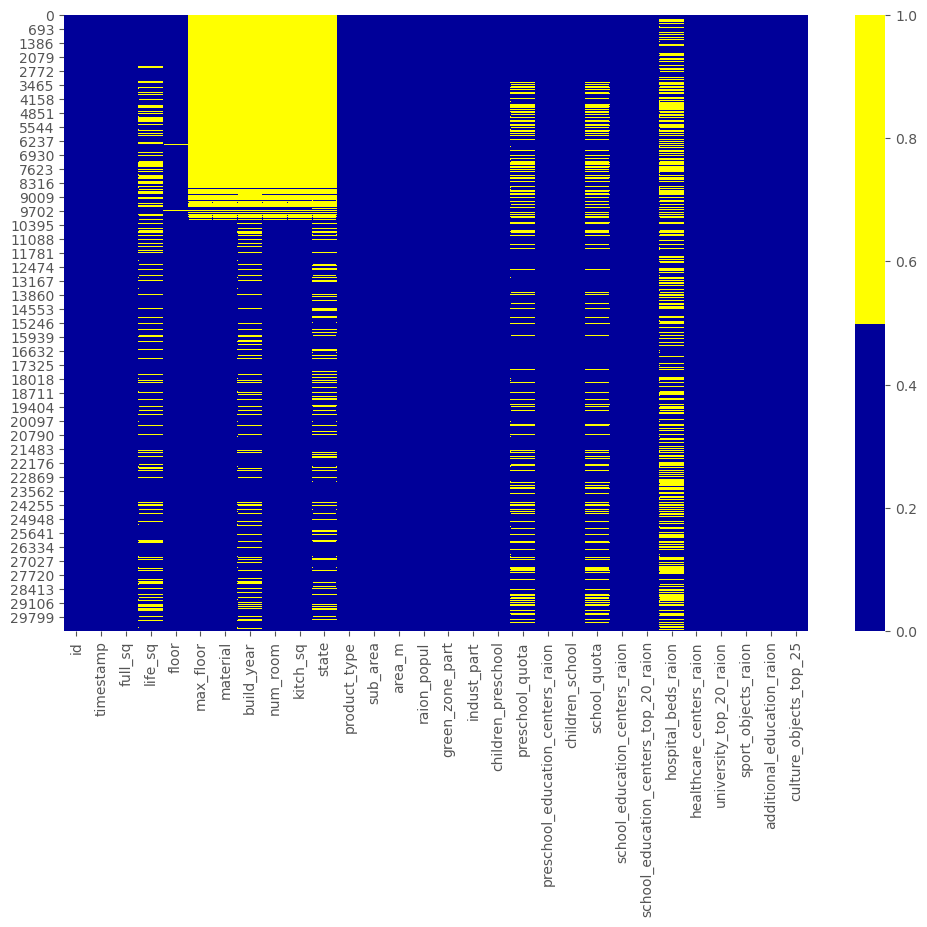

In [29]:
cols = df.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [30]:
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values * 100)))


id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

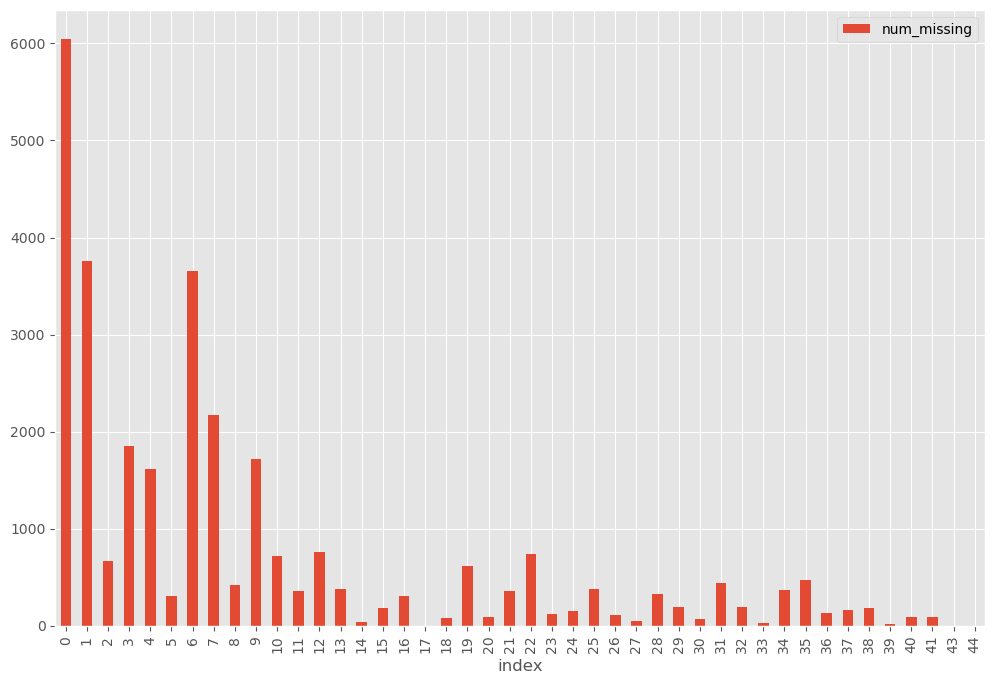

In [31]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [32]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(index=ind_missing, axis=1)
df_less_missing_rows

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,1
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,False,0
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,False,False,False,False,False,False,False,False,False,21
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,False,0


In [33]:
cols_to_drop = ['hospital_beds_raion']
df_less_hospital = df.drop(cols_to_drop, axis=1)


In [34]:
med = df['life_sq'].median()
df['life_sq'] = df['life_sq'].fillna(med)

In [35]:
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


<AxesSubplot:>

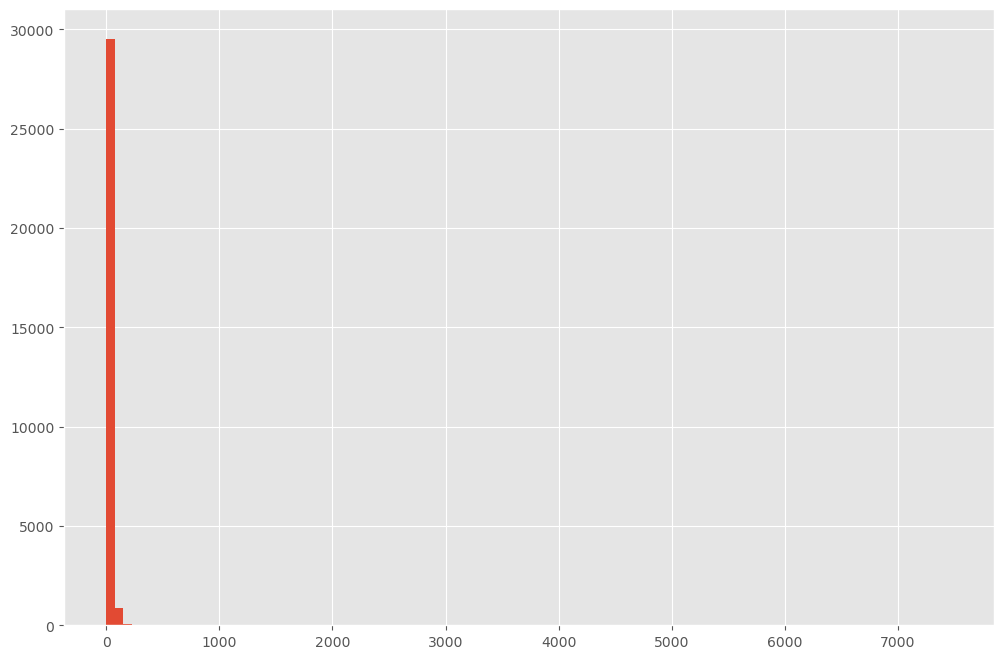

In [36]:
df['life_sq'].hist(bins=100)


<AxesSubplot:>

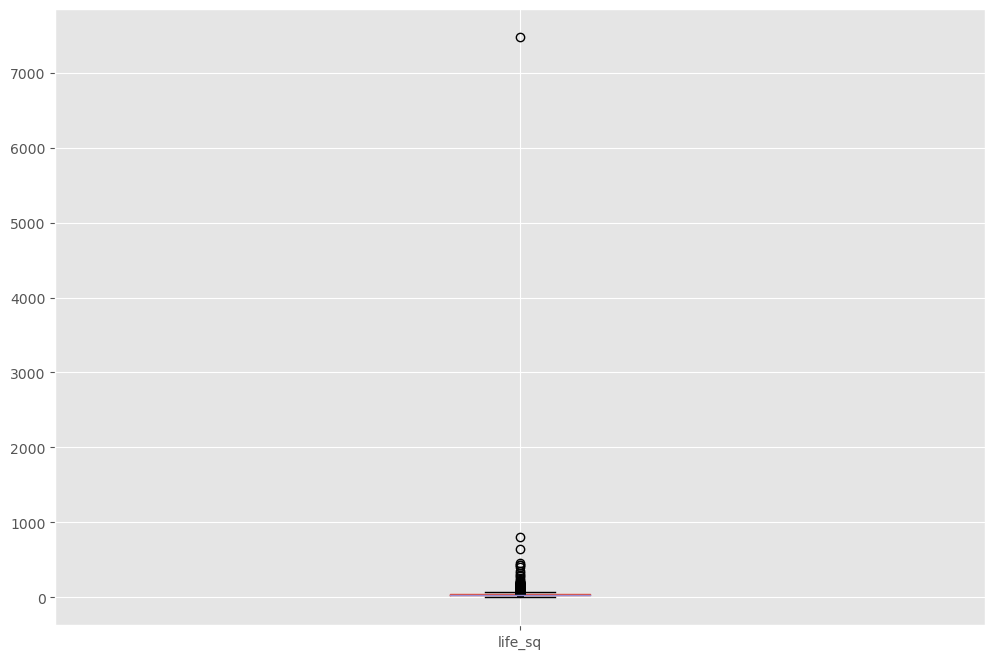

In [37]:
df.boxplot(column=['life_sq'])


In [38]:
df['life_sq'].describe()


count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

In [39]:
df_deduplicated = df.drop('id', axis=1).drop_duplicates()

print(df.shape)
print(df_deduplicated)


(30471, 344)
        timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0      2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1      2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2      2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3      2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4      2011-09-05       77     77.0    4.0        NaN       NaN         NaN   
...           ...      ...      ...    ...        ...       ...         ...   
30466  2015-06-30       44     27.0    7.0        9.0       1.0      1975.0   
30467  2015-06-30       86     59.0    3.0        9.0       2.0      1935.0   
30468  2015-06-30       45     30.0   10.0       20.0       1.0         NaN   
30469  2015-06-30       64     32.0    5.0       15.0       1.0      2003.0   
30470  2015-06-30       43     28.0    1.0        9.0       1.0      1968.0   

       num_room  kitch_sq  state  ... 

In [40]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df.fillna(-1).groupby(key)['id'].count().sort_values(ascending=False).head(20)


timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   -1.0        -1.0      8248500      2
2014-12-17  62       30.0     9.0    -1.0         2.0      6552000      2
2014-01-22  46       28.0     1.0     1968.0      2.0      3000000      2
2013-04-03  42       30.0     2.0    -1.0        -1.0      3444000      2
2013-09-23  85       30.0     14.0   -1.0         3.0      7725974      2
2012-08-27  59       30.0     6.0    -1.0        -1.0      4506800      2
2014-04-15  134      134.0    1.0     0.0         3.0      5798496      2
2013-05-22  68       30.0     2.0    -1.0        -1.0      5406690      2
2013-12-05  40       30.0     5.0    -1.0         1.0      4414080      2
2012-09-05  43       30.0     21.0   -1.0        -1.0      6229540      2
2015-03-30  41       41.0     11.0    2016.0      1.0      4114580      2
2013-12-18  39       30.0     6.0    -1.0         1.0      3700946      2
2013-06-24  40       30.0     12.0   -1.0  

In [41]:
df_deduplicated2 = df.drop_duplicates(subset=key)
print(df.shape)
print(df_deduplicated2.shape)


(30471, 344)
(30455, 344)
